# Model `PNL-PF` vs `BinaryMFPenalty`

In [17]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 4
[I] seed         : 1997
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


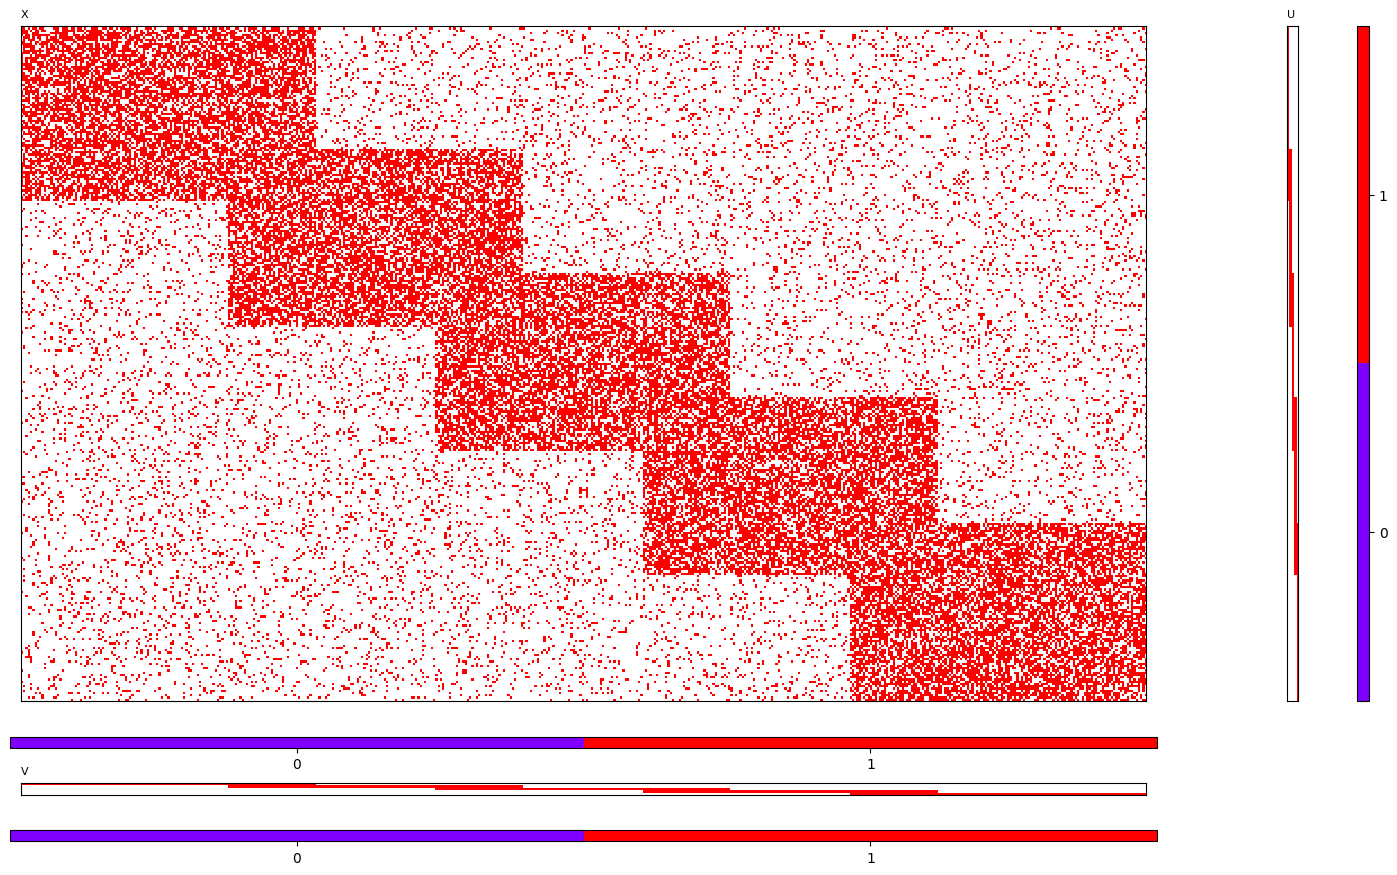

<Figure size 640x480 with 0 Axes>

In [18]:
from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.3])
data.generate(seed=1997)

data.add_noise(noise=[0.4, 0.1], seed=2000)
data.show_matrix()

In [19]:
from datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

In [20]:
from datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

split = NoSplit(X=data.X)

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1720132768
[I]   train_size   : 41003
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1720132768


# 1 Initialize U, V with `NMFSklearn` / `WNMF`

[I] k            : 5
[I] U            : None
[I] V            : None
[I] beta_loss    : frobenius
[I] init_method  : nndsvd
[I] solver       : cd
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[W] Timer not started.
[I] model saved as: 24-07-05_06-39-29_NMFSklearn.pickle


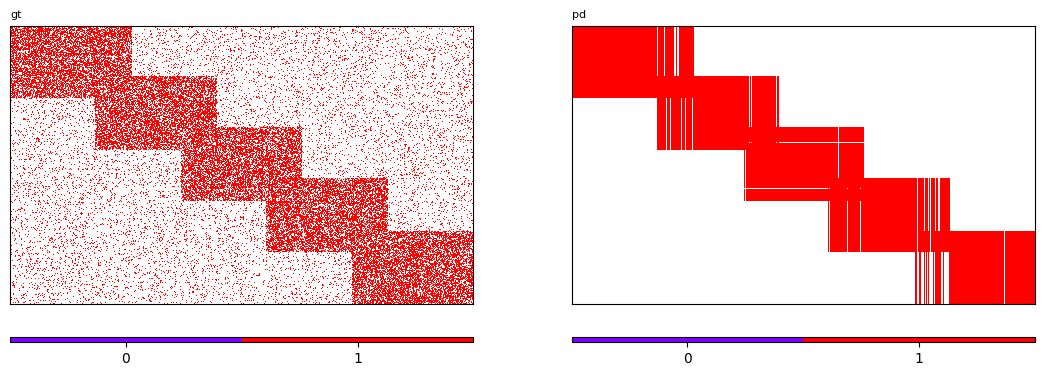

<Figure size 640x480 with 0 Axes>

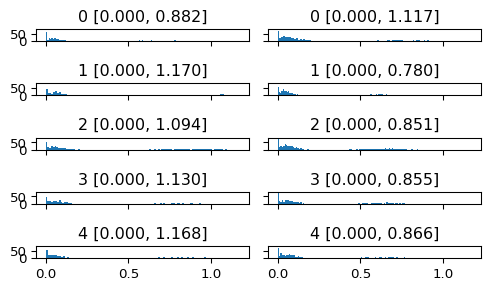

In [21]:
from models import NMFSklearn, WNMF
from utils import show_factor_distribution

k = 5

model_nmf = NMFSklearn(k=k, init_method='nndsvd', max_iter=1000, seed=2024)
# model_nmf = WNMF(k=k, W='full', beta_loss='frobenius', init_method='normal', max_iter=1000, seed=2024)

model_nmf.fit(X_train=X_train, task='reconstruction', verbose=False, display=False)

show_factor_distribution(U=model_nmf.U, V=model_nmf.V, resolution=100)

# 2. `PNL-PF`

d:\Dropbox\PyBMF\examples\..\models\BaseModel.py:53: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  self.init_model()
c:\Users\nieht\Anaconda3\envs\pybmf\lib\site-packages\scipy\sparse\_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] reg          : 1
[I] beta_loss    : frobenius
[I] solver       : mu
[I] link_lamda   : 5
[I] reg_growth   : 1.02
[I] max_reg      : 10000000000.0
[I] tol          : 0
[I] min_diff     : 0.001
[I] max_iter     : 10
[I] init_method  : custom
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] verbose      : True
[I] display      : True
[I] Missing validation data.
[W] Missing testing data.
[I] Normalized U: [0.0, 1.1698789007726795] -> [0.0, 1.0054665206616038], V: [0.0, 1.1172487558963355] -> [0.0, 1.005466520661604]


[I] error: 1.01e+04, rec_error: 1.01e+04, reg: 1.08e+00, reg_error: 2.74e+01:  40%|████      | 4/10 [00:00<00:00, 14.17it/s]

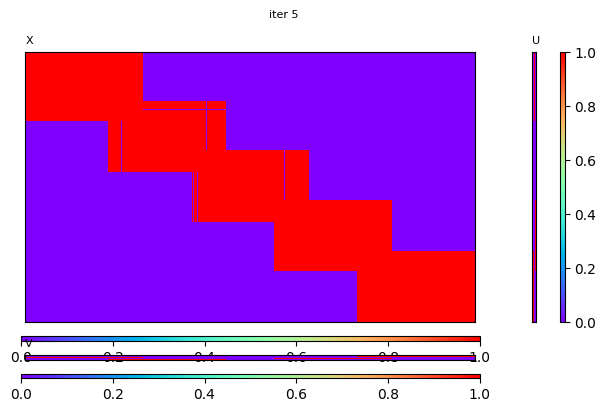

[I] error: 1.01e+04, rec_error: 1.01e+04, reg: 1.20e+00, reg_error: 3.01e+01: 100%|██████████| 10/10 [00:01<00:00,  5.65it/s]

<Figure size 640x480 with 0 Axes>

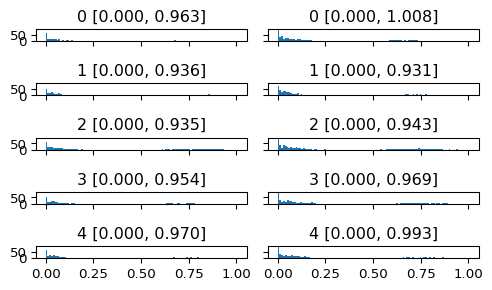

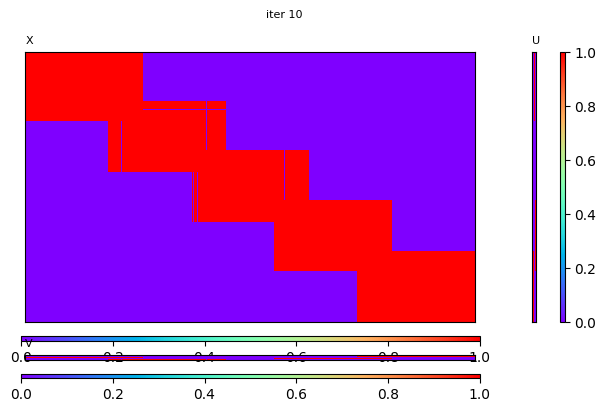

[I] error: 1.01e+04, rec_error: 1.01e+04, reg: 1.22e+00, reg_error: 3.06e+01: : 11it [00:05,  2.19it/s]                      


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-05_06-39-39_PNLPF.pickle


<Figure size 640x480 with 0 Axes>

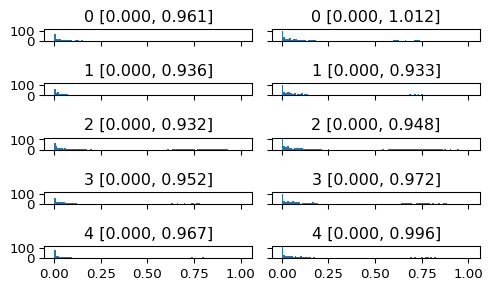

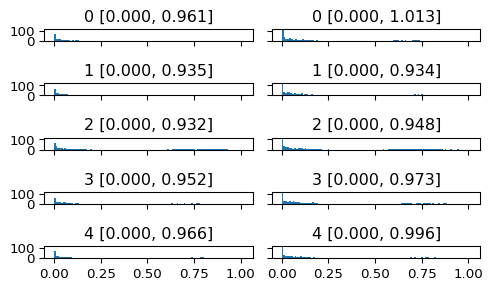

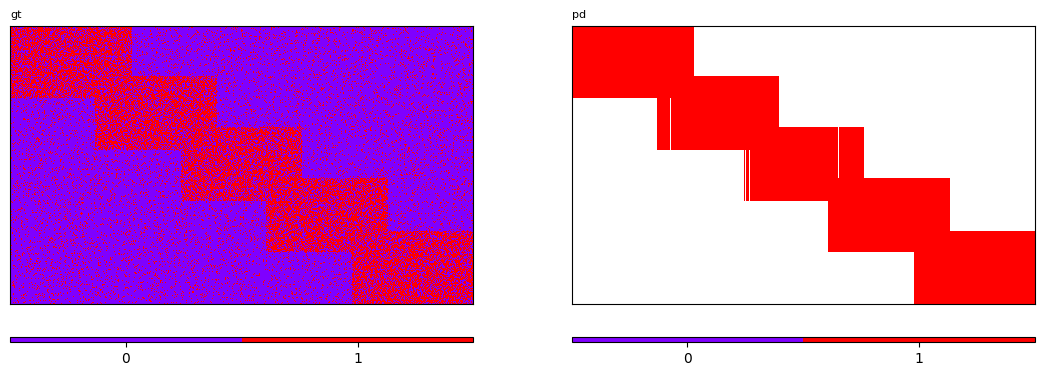

\
                                                                              
                 time iter         error     rec_error       reg  reg_error   
0   05/07/24 06:39:33    0  10165.776559  10140.131079  1.000000  25.645481   
1   05/07/24 06:39:33    1  10136.245384  10110.474801  1.000000  25.770583   
2   05/07/24 06:39:33    2  10130.916177  10104.825342  1.020000  26.090835   
3   05/07/24 06:39:33    3  10128.187989  10101.700956  1.040400  26.487033   
4   05/07/24 06:39:33    4  10126.306655  10099.379789  1.061208  26.926865   
5   05/07/24 06:39:33    5  10124.944818  10097.546272  1.082432  27.398546   
6   05/07/24 06:39:34    6  10123.950244  10096.055411  1.104081  27.894833   
7   05/07/24 06:39:34    7  10123.229502  10094.818302  1.126162  28.411200   
8   05/07/24 06:39:34    8  10122.720150  10093.775420  1.148686  28.944730   
9   05/07/24 06:39:34    9  10122.378526  10092.885004  1.171659  29.493522   
10  05/07/24 06:39:34   10  10122.173086  10092.116753  1.195093  30.056333   
11  05/07/24 06:39:38   11  10122.080433  10091.448076  1.218994  30.632357   

       train            
           0            
        RMSE       MAE  
0   0.367698  0.279775  
1   0.367160  0.278785  
2   0.367057  0.277964  
3   0.367000  0.277360  
4   0.366958  0.276891  
5   0.366925  0.276516  
6   0.366898  0.276209  
7   0.366875  0.275951  
8   0.366856  0.275731  
9   0.366840  0.275539  
10  0.366826  0.275371  
11  0.366814  0.275221

train                              
                              0                              
                 time    Recall Precision  Accuracy        F1
0   05/07/24 06:39:33  0.735800  0.641478  0.815367  0.685409
1   05/07/24 06:39:33  0.741263  0.640696  0.815640  0.687321
2   05/07/24 06:39:33  0.743409  0.640311  0.815707  0.688019
3   05/07/24 06:39:33  0.743409  0.640311  0.815707  0.688019
4   05/07/24 06:39:33  0.743409  0.640311  0.815707  0.688019
5   05/07/24 06:39:33  0.743409  0.640311  0.815707  0.688019
6   05/07/24 06:39:34  0.743409  0.640311  0.815707  0.688019
7   05/07/24 06:39:34  0.743409  0.640311  0.815707  0.688019
8   05/07/24 06:39:34  0.743409  0.640311  0.815707  0.688019
9   05/07/24 06:39:34  0.743409  0.640311  0.815707  0.688019
10  05/07/24 06:39:35  0.743409  0.640311  0.815707  0.688019
11  05/07/24 06:39:38  0.743409  0.640311  0.815707  0.688019

<Figure size 640x480 with 0 Axes>

In [22]:
from models import PNLPF
import numpy as np
from utils import show_factor_distribution

# load U and V
U, V = model_nmf.U.copy(), model_nmf.V.copy()

# PNLPF
k = 10
reg = 1
reg_growth = 1.02
W = 'full'
task = 'reconstruction'
max_iter = 10
min_diff = 1e-3
tol = 0
link_lamda = 5
init_method = 'custom' # 'custom', 'uniform', 'normal'

model_bmfps = PNLPF(k=k, U=U, V=V, W=W, reg=reg, reg_growth=reg_growth, init_method=init_method, max_iter=max_iter, min_diff=min_diff, tol=tol, link_lamda=link_lamda, seed=2024)
model_bmfps.fit(X_train=X_train, task=task, verbose=True, display=True)

# 3. `BinaryMFPenalty`

d:\Dropbox\PyBMF\examples\..\models\BaseModel.py:53: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  self.init_model()
c:\Users\nieht\Anaconda3\envs\pybmf\lib\site-packages\scipy\sparse\_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] reg          : 1
[I] beta_loss    : frobenius
[I] solver       : mu
[I] reg_growth   : 1.02
[I] max_reg      : 10000000000.0
[I] tol          : 0
[I] min_diff     : 0.001
[I] max_iter     : 10
[I] init_method  : custom
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] verbose      : True
[I] display      : True
[I] Normalized U: [0.0, 1.0054665206616038] -> [0.0, 1.0054665206616038], V: [0.0, 1.005466520661604] -> [0.0, 1.005466520661604]


[I] error: 1.01e+04, rec_error: 1.01e+04, reg: 1.08e+00, reg_error: 2.75e+01:  50%|█████     | 5/10 [00:00<00:00,  7.65it/s]

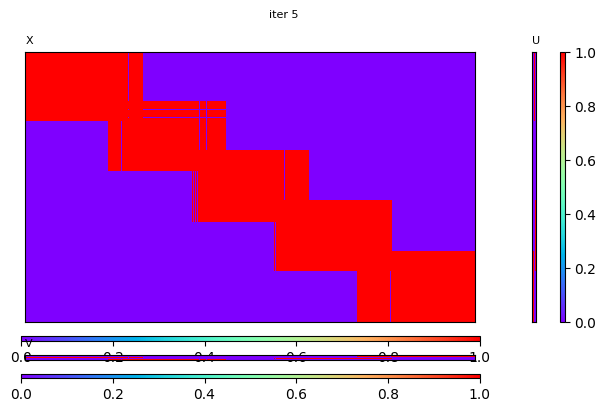

[I] error: 1.01e+04, rec_error: 1.01e+04, reg: 1.20e+00, reg_error: 3.03e+01: 100%|██████████| 10/10 [00:02<00:00,  4.53it/s]

<Figure size 640x480 with 0 Axes>

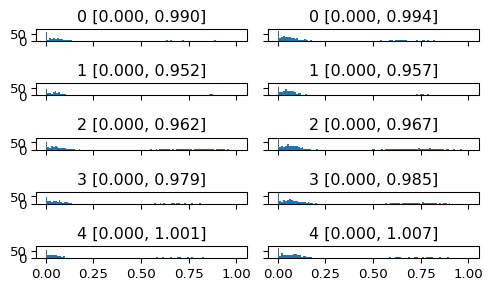

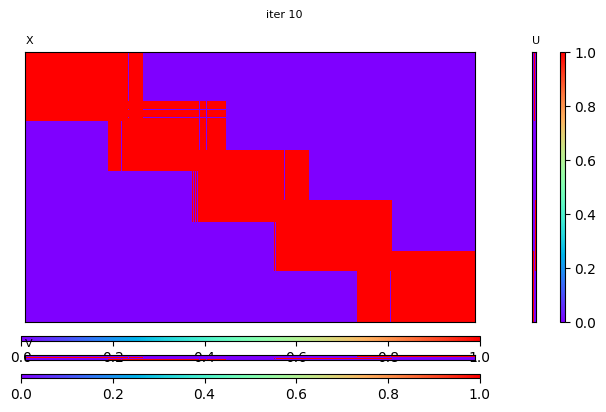

[I] error: 1.01e+04, rec_error: 1.01e+04, reg: 1.22e+00, reg_error: 3.09e+01: : 11it [00:05,  2.06it/s]                      


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-05_06-41-55_BinaryMFPenalty.pickle


<Figure size 640x480 with 0 Axes>

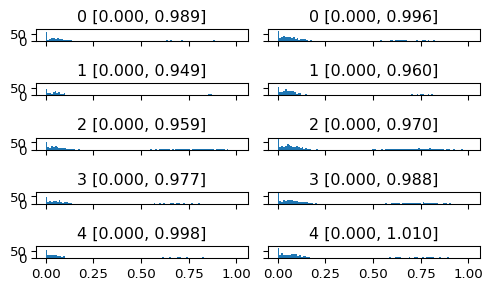

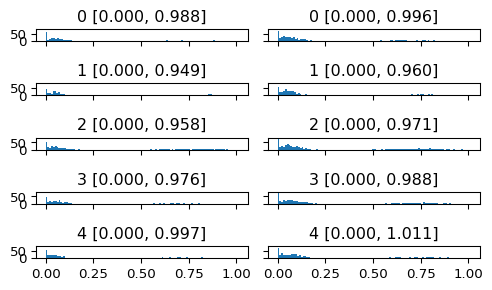

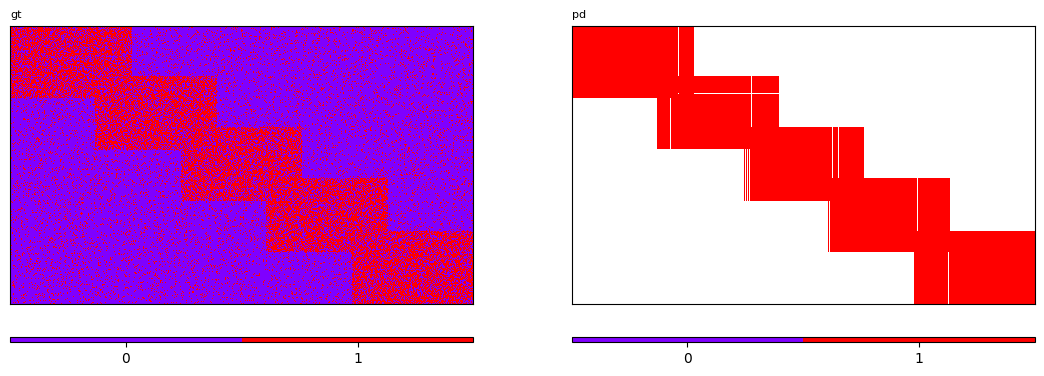

\
                                                                              
                 time iter         error     rec_error       reg  reg_error   
0   05/07/24 06:41:49    0  10137.229054  10111.583574  1.000000  25.645481   
1   05/07/24 06:41:49    1  10137.144198  10111.613702  1.000000  25.530496   
2   05/07/24 06:41:49    2  10137.629085  10111.637297  1.020000  25.991788   
3   05/07/24 06:41:49    3  10138.133993  10111.654701  1.040400  26.479292   
4   05/07/24 06:41:50    4  10138.652395  10111.667677  1.061208  26.984718   
5   05/07/24 06:41:50    5  10139.182494  10111.678080  1.082432  27.504414   
6   05/07/24 06:41:51    6  10139.723725  10111.687031  1.104081  28.036694   
7   05/07/24 06:41:51    7  10140.275935  10111.695159  1.126162  28.580776   
8   05/07/24 06:41:51    8  10140.839140  10111.702825  1.148686  29.136316   
9   05/07/24 06:41:51    9  10141.413438  10111.710250  1.171659  29.703188   
10  05/07/24 06:41:52   10  10141.998969  10111.717578  1.195093  30.281391   
11  05/07/24 06:41:54   11  10142.595897  10111.724909  1.218994  30.870988   

       train                 val                test            
           0                   0                   0            
        RMSE       MAE      RMSE       MAE      RMSE       MAE  
0   0.367180  0.271087  0.367180  0.271087  0.367180  0.271087  
1   0.367180  0.270823  0.367180  0.270823  0.367180  0.270823  
2   0.367181  0.270694  0.367181  0.270694  0.367181  0.270694  
3   0.367181  0.270626  0.367181  0.270626  0.367181  0.270626  
4   0.367181  0.270585  0.367181  0.270585  0.367181  0.270585  
5   0.367182  0.270558  0.367182  0.270558  0.367182  0.270558  
6   0.367182  0.270538  0.367182  0.270538  0.367182  0.270538  
7   0.367182  0.270521  0.367182  0.270521  0.367182  0.270521  
8   0.367182  0.270506  0.367182  0.270506  0.367182  0.270506  
9   0.367182  0.270493  0.367182  0.270493  0.367182  0.270493  
10  0.367182  0.270479  0.367182  0.270479  0.367182  0.270479  
11  0.367183  0.270467  0.367183  0.270467  0.367183  0.270467

train                                   val            \
                            0                                     0             
                 time  Recall Precision  Accuracy        F1  Recall Precision   
0   05/07/24 06:41:49  0.7358  0.641478  0.815367  0.685409  0.7358  0.641478   
1   05/07/24 06:41:49  0.7358  0.641478  0.815367  0.685409  0.7358  0.641478   
2   05/07/24 06:41:49  0.7358  0.641478  0.815367  0.685409  0.7358  0.641478   
3   05/07/24 06:41:49  0.7358  0.641478  0.815367  0.685409  0.7358  0.641478   
4   05/07/24 06:41:50  0.7358  0.641478  0.815367  0.685409  0.7358  0.641478   
5   05/07/24 06:41:50  0.7358  0.641478  0.815367  0.685409  0.7358  0.641478   
6   05/07/24 06:41:51  0.7358  0.641478  0.815367  0.685409  0.7358  0.641478   
7   05/07/24 06:41:51  0.7358  0.641478  0.815367  0.685409  0.7358  0.641478   
8   05/07/24 06:41:51  0.7358  0.641478  0.815367  0.685409  0.7358  0.641478   
9   05/07/24 06:41:51  0.7358  0.641478  0.815367  0.685409  0.7358  0.641478   
10  05/07/24 06:41:52  0.7358  0.641478  0.815367  0.685409  0.7358  0.641478   
11  05/07/24 06:41:54  0.7358  0.641478  0.815367  0.685409  0.7358  0.641478   

                          test                                
                             0                                
    Accuracy        F1  Recall Precision  Accuracy        F1  
0   0.815367  0.685409  0.7358  0.641478  0.815367  0.685409  
1   0.815367  0.685409  0.7358  0.641478  0.815367  0.685409  
2   0.815367  0.685409  0.7358  0.641478  0.815367  0.685409  
3   0.815367  0.685409  0.7358  0.641478  0.815367  0.685409  
4   0.815367  0.685409  0.7358  0.641478  0.815367  0.685409  
5   0.815367  0.685409  0.7358  0.641478  0.815367  0.685409  
6   0.815367  0.685409  0.7358  0.641478  0.815367  0.685409  
7   0.815367  0.685409  0.7358  0.641478  0.815367  0.685409  
8   0.815367  0.685409  0.7358  0.641478  0.815367  0.685409  
9   0.815367  0.685409  0.7358  0.641478  0.815367  0.685409  
10  0.815367  0.685409  0.7358  0.641478  0.815367  0.685409  
11  0.815367  0.685409  0.7358  0.641478  0.815367  0.685409

<Figure size 640x480 with 0 Axes>

In [24]:
from models import BinaryMFPenalty

model_bmfp = BinaryMFPenalty(k=k, U=U, V=V, W=W, reg=reg, reg_growth=reg_growth, init_method='custom', max_iter=max_iter, min_diff=min_diff, tol=tol, seed=2024)
model_bmfp.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='reconstruction', verbose=True, display=True)